In [1]:
import sys
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import homogeneity_score,completeness_score,v_measure_score,accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
from sklearn.neighbors import KNeighborsClassifier



from sklearn.feature_selection import RFE

TRAIN_TEST_RATIO = 0.25

In [2]:

data = pd.read_csv('dermatology.data.txt', sep=",", header = None)

# [1-11,34] podaci pre analiza
# [12-33] podaci nakon analiza
data.columns = cols = ["erythema", "scaling", "definite borders", "itching","koebner phenomenon",
                "polygonal papules","follicular papules","oral mucosal involvement","knee and elbow involvement",
                "scalp involvement","family history","melanin incontinence","eosinophils in the infiltrate","PNL infiltrate",
                "fibrosis of the papillary dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis","clubbing of the rete ridges",
               "elongation of the rete ridges","thinning of the suprapapillary epidermis","spongiform pustule","munro microabcess","focal hypergranulosis",
               "disappearance of the granular layer","vacuolisation and damage of basal layer","spongiosis","saw-tooth appearance of retes","follicular horn plug",
               "perifollicular parakeratosis","inflammatory monoluclear inflitrate","band-like infiltrate","Age","des_class"]

# data.head()

#izbaciti redove koje sadrze '?' u koloni za godine
# print(len(data))
data = data[data.Age != '?']
print(len(data))
data = data[data.des_class != 6]
print(len(data))

#izbaciti godine za probu

# data = data.drop('Age',1)


results = data['des_class']

#normalize


data_unnorm = data 

cols = data.columns

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


data.columns = cols

attributes = data.drop('des_class',1)
results.head()
# print(attributes[attributes.columns[1]])
# attributes.head()
# print(len(results))

358
338


0    2
1    1
2    3
3    1
4    3
Name: des_class, dtype: int64

In [3]:

train_data, test_data,train_results,test_results = train_test_split(attributes, results ,test_size=TRAIN_TEST_RATIO)


print('%d - %d' % (len(train_results), len(test_results)))


253 - 85


In [11]:
#izbaciti atrbiute dobijene biopsijom
# for i in range(12,33):
#     train_data = train_data.drop(cols[i],1)
#     test_data = test_data.drop(cols[i],1)

import numpy
for i in range(0,34):
    cor = numpy.corrcoef(data[cols[i]],data['des_class'])[0][1]
    print(str(cols[i]) + ": " + str(cor))
#     if abs(cor) < 0.09:
#         print('remove')
#         train_data = train_data.drop(cols[i],1)
#         test_data = test_data.drop(cols[i],1)
    
    
    
# naci najbitinije feature
# model = ExtraTreesClassifier(n_estimators=250)
# model.fit(data, results)
# print(model.feature_importances_)
# cols = deepcopy(train_data.columns)
# print(len(cols))
# for idx,elem in enumerate(model.feature_importances_):
    
#     if float(elem) < float(0.01):
#         print(cols[idx])
       
#         train_data = train_data.drop(cols[idx],1)
#         test_data = test_data.drop(cols[idx],1)


# model = LogisticRegression()
# rfe = RFE(model, 10)
# fit = rfe.fit(data, results)
# print(fit.n_features_)
# print(fit.support_)
# print(fit.ranking_)

# cols = deepcopy(data.columns)

# print(len(cols))

# for idx,elem in enumerate(fit.support_):
    
#     if not elem:
#         print(elem)
#         print(idx)
#         print(cols[idx])
       
#         train_data = train_data.drop(cols[idx],1)
#         test_data = test_data.drop(cols[idx],1)




erythema: -0.373156906156
scaling: -0.521036464388
definite borders: -0.369496528279
itching: 0.153032058223
koebner phenomenon: -0.00656231106842
polygonal papules: 0.139625602803
follicular papules: 0.170276145112
oral mucosal involvement: 0.134655032409
knee and elbow involvement: -0.622259079676
scalp involvement: -0.623278285281
family history: -0.352511262316
melanin incontinence: 0.139012765993
eosinophils in the infiltrate: -0.0203462847742
PNL infiltrate: -0.565289333416
fibrosis of the papillary dermis: 0.645863210912
exocytosis: 0.311178870953
acanthosis: -0.0640055945425
hyperkeratosis: -0.141689015434
parakeratosis: -0.496818109908
clubbing of the rete ridges: -0.718973966247
elongation of the rete ridges: -0.346299657536
thinning of the suprapapillary epidermis: -0.708731668025
spongiform pustule: -0.477381386362
munro microabcess: -0.533744142582
focal hypergranulosis: 0.137551821136
disappearance of the granular layer: -0.41952150852
vacuolisation and damage of basal la

In [5]:
neigh = KNeighborsClassifier(n_neighbors=5 )
neigh.fit(train_data, train_results) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
predicted = neigh.predict(test_data)

print(accuracy_score(predicted,test_results))

import sklearn.metrics as sm
sm.confusion_matrix(test_results,predicted)



0.964705882353


array([[30,  0,  0,  0,  0],
       [ 0, 13,  0,  2,  0],
       [ 0,  0, 17,  0,  0],
       [ 0,  1,  0, 12,  0],
       [ 0,  0,  0,  0, 10]])

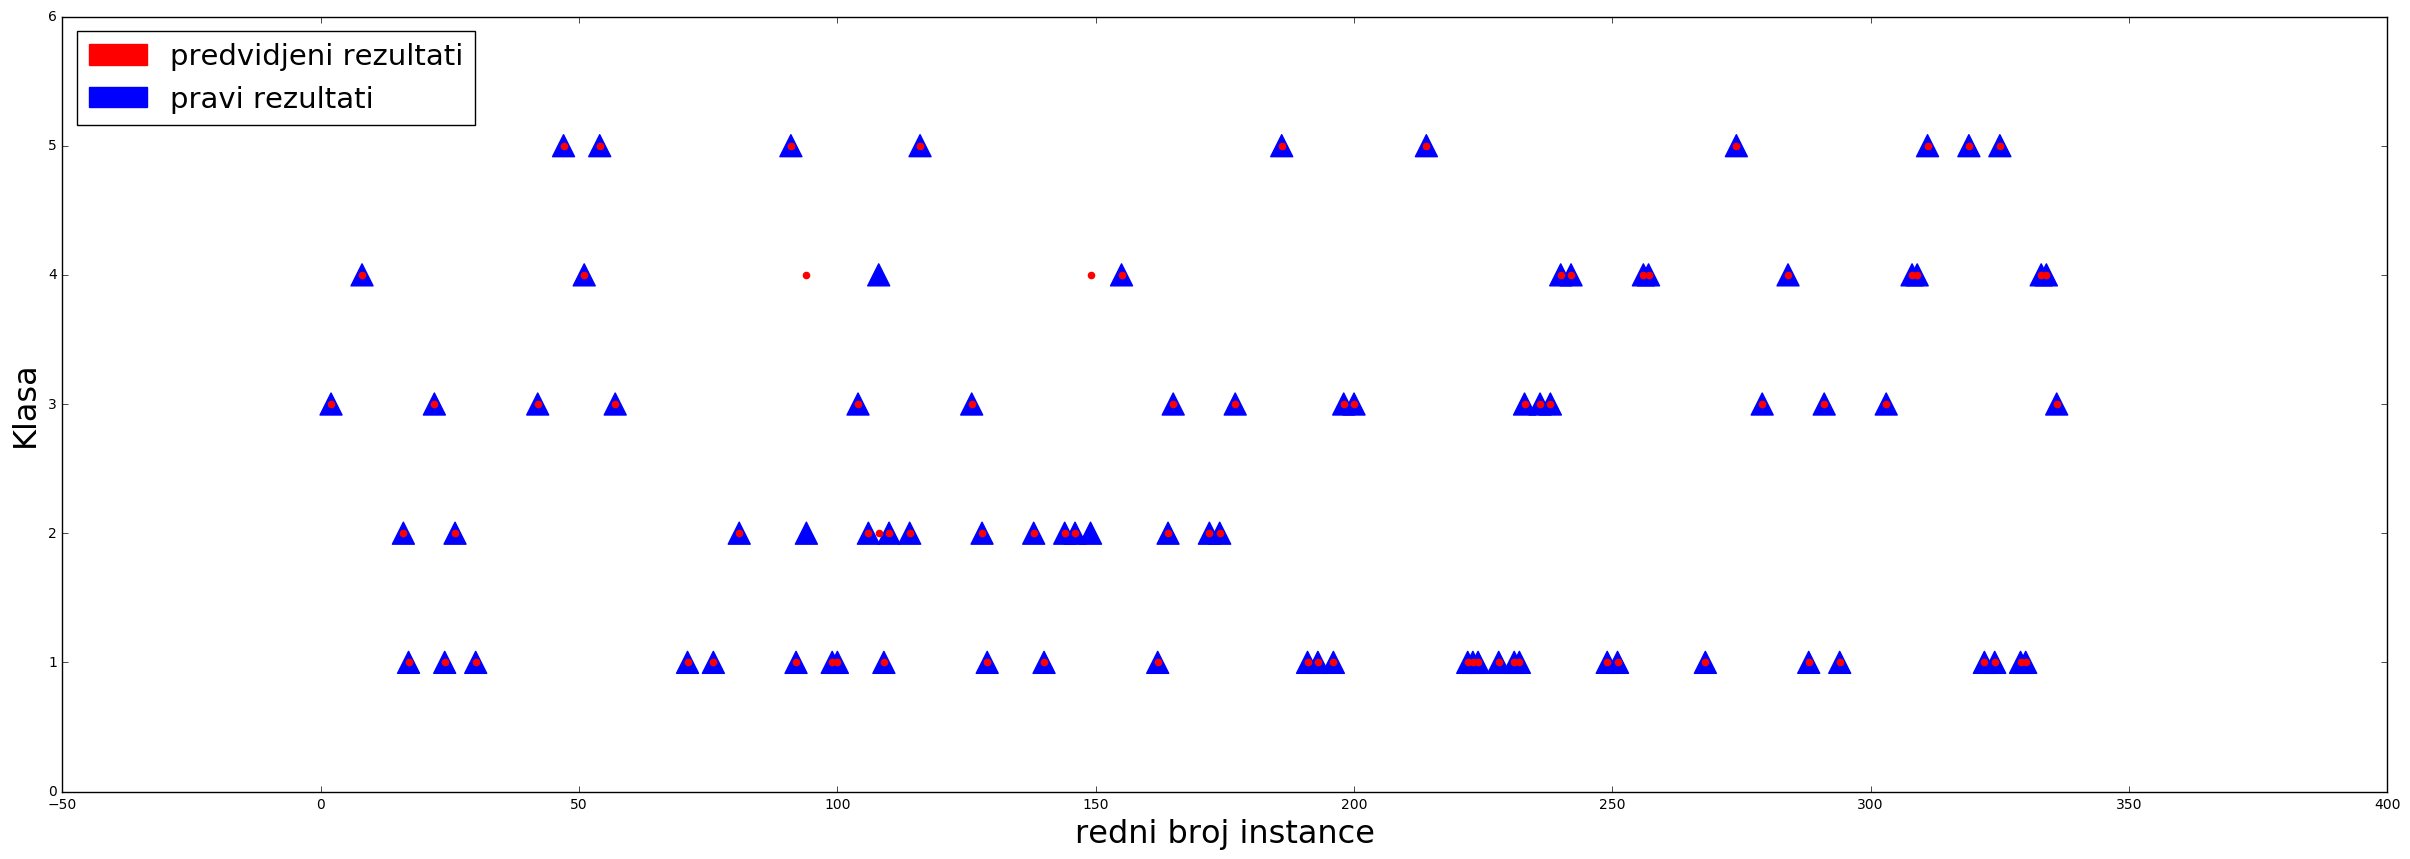

In [7]:
#all results
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


rows= test_data.axes[0]
rows = [elem for elem in rows]



X = rows
Y = test_results

plt.figure(figsize=(30,10))

# s = [float(12*n) for n in range(len(X))]
s = [251 for n in range(len(X))]

plt.scatter(X,Y,marker='^',color='b',edgecolors='b',s=s)
plt.scatter(X,predicted,marker='o',color='r')

red_patch = mpatches.Patch(color='red', label='predvidjeni rezultati')
blue_patch = mpatches.Patch(color='b', label='pravi rezultati')
plt.legend(handles=[red_patch,blue_patch],prop={'size':21},loc=2)
plt.ylabel('Klasa',size=23)
plt.xlabel('redni broj instance',size=23)



plt.show()

[149, 94, 108] [2, 2, 4] [4, 4, 2]


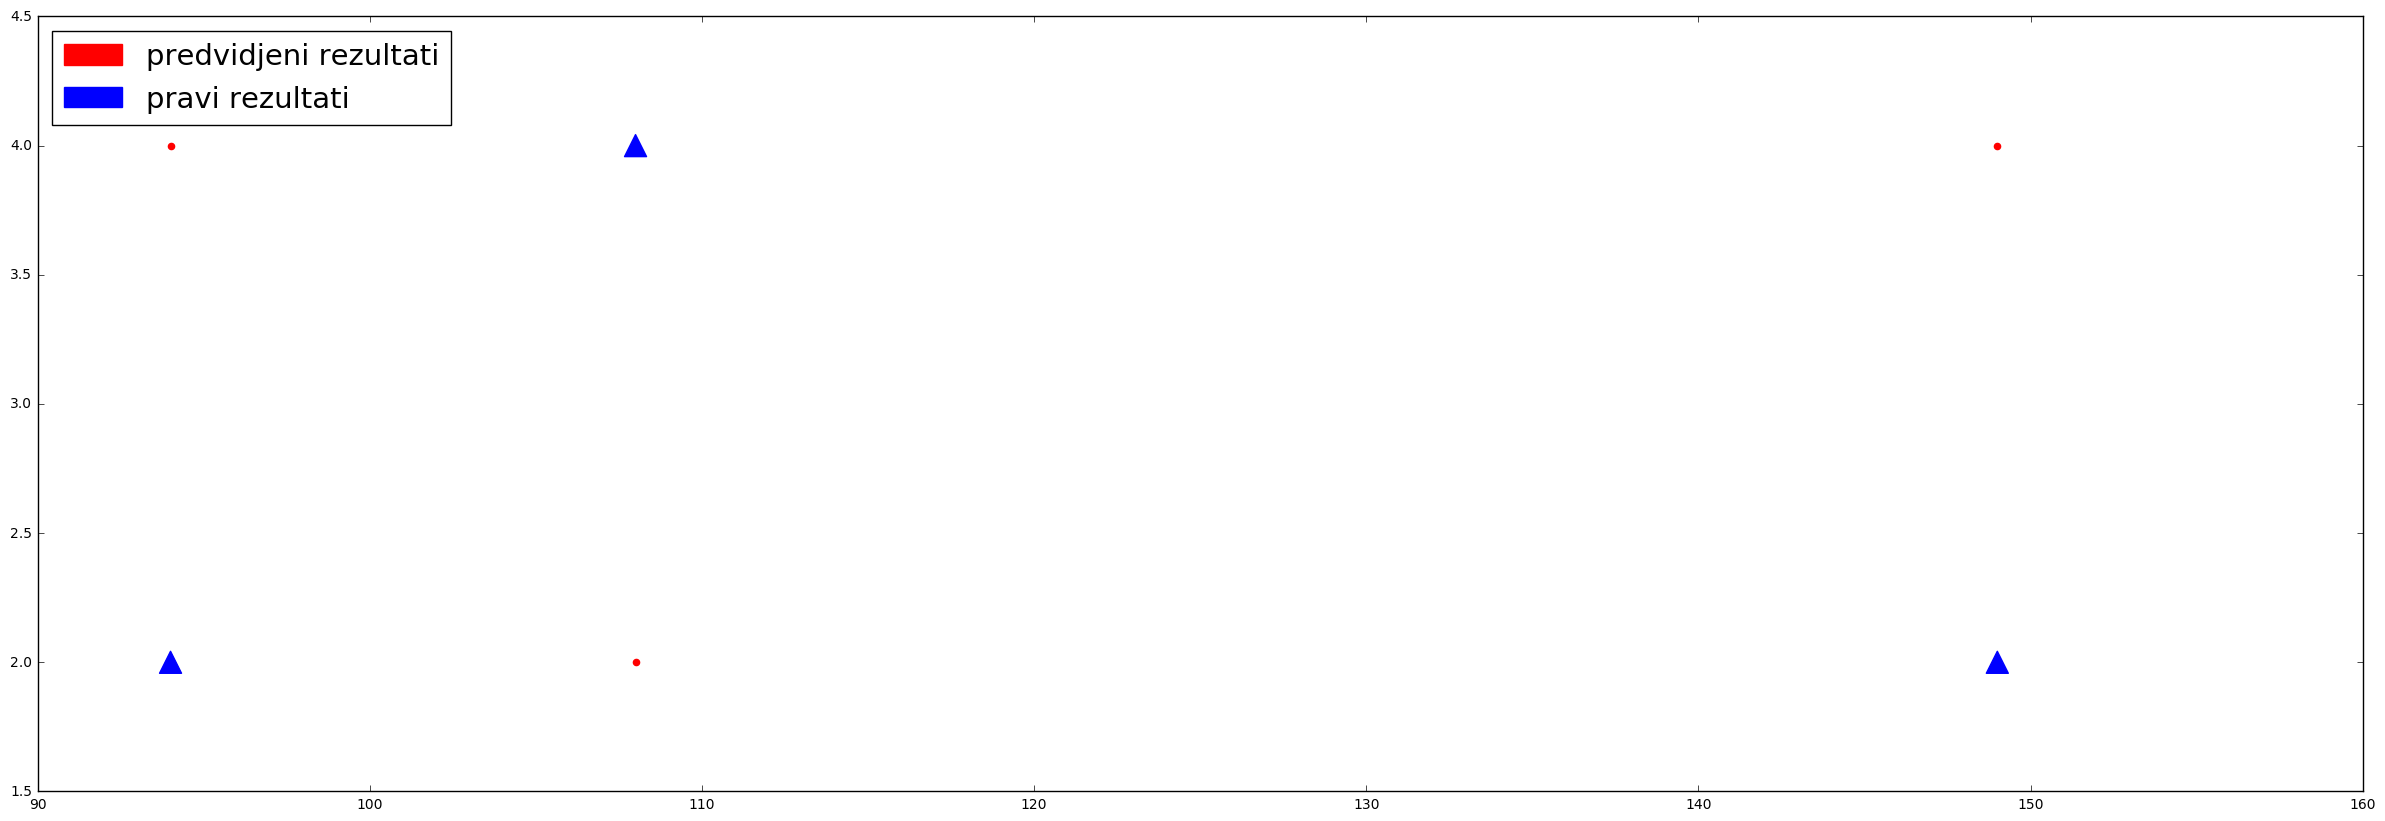

In [8]:
import numpy as np
import matplotlib.pyplot as plt


rows= test_data.axes[0]
rows = [elem for elem in rows]
X = []
Y = []
Y_pred = []
#leave only wrong predictions
for pred, real, x in zip(predicted,test_results,rows):
    if pred != real:
        X.append(x)
        Y.append(real)
        Y_pred.append(pred)
    
print(X,Y,Y_pred)


plt.figure(figsize=(30,10))

# s = [float(12*n) for n in range(len(X))]
s = [251 for n in range(len(X))]

plt.scatter(X,Y,marker='^',color='b',edgecolors='b',s=s)
plt.scatter(X,Y_pred,marker='o',color='r')

red_patch = mpatches.Patch(color='red', label='predvidjeni rezultati')
blue_patch = mpatches.Patch(color='b', label='pravi rezultati')
plt.legend(handles=[red_patch,blue_patch],prop={'size':21},loc=2)

plt.show()

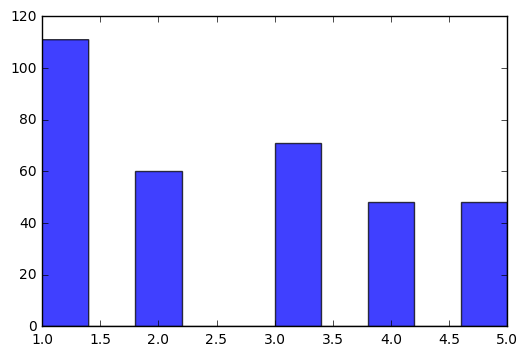

In [9]:
#histogram raspodele klasa
plt.hist(results, 10, facecolor='b', alpha=0.75)
plt.show()

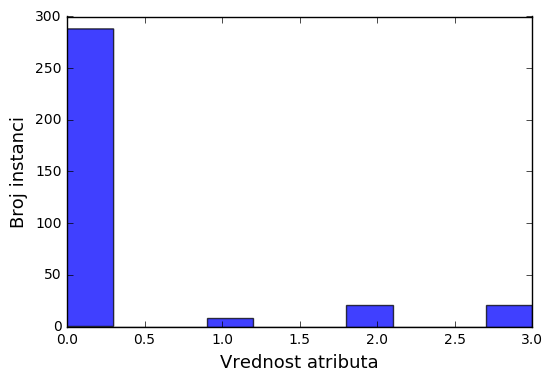

In [10]:
for i in range(14,15):
    plt.hist(data_unnorm[data_unnorm.columns[i]], 10, facecolor='b', alpha=0.75)
    plt.xlabel('Vrednost atributa',size=13)
    plt.ylabel('Broj instanci',size=13)
    plt.show()
   